**Set environment**

In [2]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [1]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**View files**

In [3]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
txt_fname  = "region.annotation.fcc_starrmpra_group.coverage.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_group.coverage.atac.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_group.coverage.crispri.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.fcc_starrmpra_group.coverage.fcc.tsv 


## Import data

**Import FCC region coverage scores**

In [4]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
    txt_fname = "region.annotation.fcc_starrmpra_group.coverage.atac.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_coverage_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150046     17

$fcc_astarr_macs_input_union
[1] 246862     17



Chrom,ChromStart,ChromEnd,Region,Distance2TSS,TSS_Proximity,TSS,Direction_Assay,Group,Score,Score_Label,Score_Quantile,Zcore,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,1469,Proximal,0,Inactive,Proximal:Inactive,3.940038,ASTARR Input TPM,Q3,-0.2608700,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC
chr1,14282,14614,chr1:14282-14614,2409,Distal,0,Inactive,Distal:Inactive,2.841707,ASTARR Input TPM,Q2,-0.6570534,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC
chr1,16025,16338,chr1:16025-16338,1099,Proximal,0,Inactive,Proximal:Inactive,3.830812,ASTARR Input TPM,Q3,-0.2960970,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC


## Arrange table

In [5]:
lst = lst_dat_region_annot_coverage_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::filter(Assay_Label == "ATAC")
    return(dat)
})

lst_dat_region_annot_coverage_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150046     17

$fcc_astarr_macs_input_union
[1] 246862     17



Chrom,ChromStart,ChromEnd,Region,Distance2TSS,TSS_Proximity,TSS,Direction_Assay,Group,Score,Score_Label,Score_Quantile,Zcore,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,1469,Proximal,0,Inactive,Proximal:Inactive,3.940038,ASTARR Input TPM,Q3,-0.2608700,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC
chr1,14282,14614,chr1:14282-14614,2409,Distal,0,Inactive,Distal:Inactive,2.841707,ASTARR Input TPM,Q2,-0.6570534,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC
chr1,16025,16338,chr1:16025-16338,1099,Proximal,0,Inactive,Proximal:Inactive,3.830812,ASTARR Input TPM,Q3,-0.2960970,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC


## Summarize as table

**Helper function to get the mode of a continuous variable**

In [6]:
get_mode_continuous <- function(x, ...) {
    obj = density(x, ...)
    num = obj$x[which.max(obj$y)]
    return(num)
}

**Show table**

In [7]:
### get table
lst = lst_dat_region_annot_coverage_import
dat = lst[["fcc_astarr_macs_input_overlap"]]

dat = dat %>%
    dplyr::group_by(Group) %>%
    dplyr::summarise(
        Min    = min(Score),
        Q25    = quantile(Score, probs = 0.25),
        Mean   = mean(Score),
        Median = median(Score),
        Mode   = get_mode_continuous(Score),
        Q75    = quantile(Score, probs = 0.75),
        Max    = max(Score)
    )

fun = function(x){return(round(x, 2))}
dat = dat %>% dplyr::mutate(across(where(is.numeric), fun))
### show table
fun_markdown_table(dat)



|Group               |  Min|   Q25|  Mean| Median|  Mode|   Q75|    Max|
|:-------------------|----:|-----:|-----:|------:|-----:|-----:|------:|
|Distal:Active       | 1.71|  3.69|  9.53|   6.13|  3.55| 12.13|  81.61|
|Distal:Inactive     | 0.00|  2.65|  4.60|   3.31|  3.29|  4.79| 473.26|
|Distal:Repressive   | 1.81|  2.78|  5.44|   3.69|  2.78|  5.42|  62.44|
|Proximal:Active     | 1.91| 16.79| 26.43|  25.48| 23.87| 34.84| 115.09|
|Proximal:Inactive   | 1.66|  3.63| 13.25|   8.07|  3.48| 19.56| 126.39|
|Proximal:Repressive | 1.87|  4.23| 11.36|   7.69|  4.56| 15.92|  50.45|

## Explore: Visualize GC content distribution across STARR/MRPA CRE groups

**Set plot style**

In [8]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 16),
    #legend.title = element_text(size = 16),
    legend.title = element_blank(),
    legend.text  = element_text(size = 16),
    strip.text   = element_text(size = 16)
)

### set color
vec_txt_color  = c("Proximal" = "#fb8072", "Distal" = "#66c2a5")
theme_color = scale_fill_manual(values = vec_txt_color)

### set factor order
vec_txt_group = c(
    "Proximal:Active", "Proximal:Repressive", 
    "Distal:Active",   "Distal:Repressive", 
    "Proximal:Inactive", "Distal:Inactive"
)

**Generate plot**

Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_density()`).”


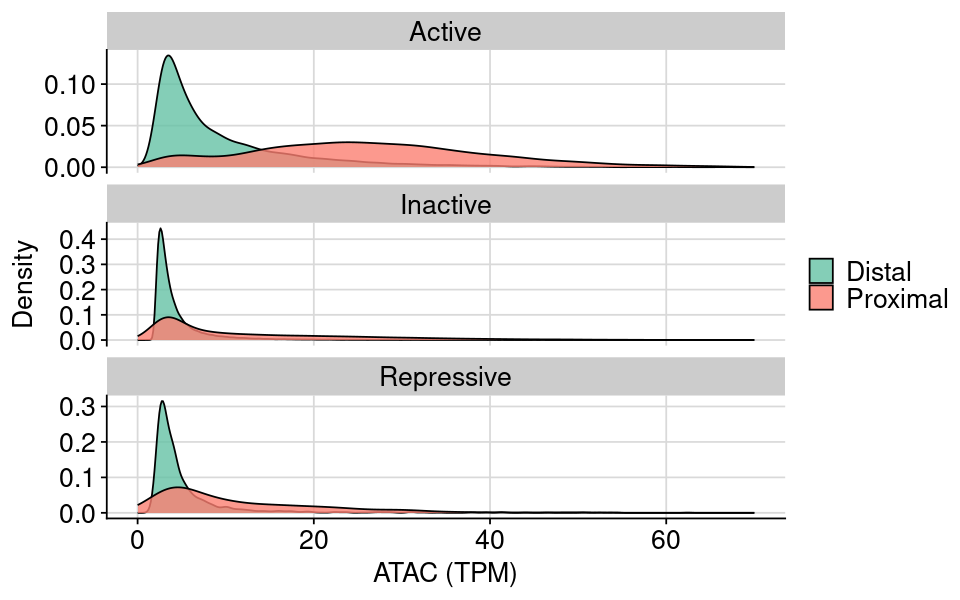

In [10]:
### get table
lst = lst_dat_region_annot_coverage_import
dat = lst[["fcc_astarr_macs_input_overlap"]]

### set factor
dat = dat %>% dplyr::mutate(Group = factor(Group, levels = rev(vec_txt_group)))

### generate plot
gpt = ggplot(dat, aes(x=Score, fill=TSS_Proximity)) + 
    geom_density(alpha = 0.8) + 
    theme_cowplot() + 
    background_grid() +
    labs(x="ATAC (TPM)", y = "Density") +
    facet_wrap(~Direction_Assay, ncol = 1, scale = "free_y") +
    theme_text +
    theme_color +
    xlim(0, 70)

### assign and show
gpt_export_atac_by_group = gpt
options(repr.plot.height = 5, repr.plot.width = 8)
print(gpt)

**Explort plots**

In [ ]:
plt_export = gpt_export_atac_by_group
txt_export = "fig.fcc_comparison.fcc_starrmpra_group.atac_coverage_score.boxplot"
num_height = sum(vec_export) * 1.5
num_width  = 12

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")